In [1]:
%reset -f
import matplotlib.pyplot as plt    # import matplotlib
import numpy as np                 # import numpy
import scipy as sp                 # import scipy
import math                        # import basic math functions
import random
import sys
import seaborn as sns  
# sys.path.append('C:\Users\mahal\Thesis_code\oscillations-and-memory')
import gating_variables as gate
import init_regimes as Init

In [2]:
def generatespikes(V_pre,V_th,T,dt):
    '''INPUT:
    V_th: coltage threhsold for spike detection
    V_pre: input voltage to assess the spike times
    T: duration of simulation of mV data
    dt: timestep
       OUTPUT:
    spike_train:spikes represented visually
    spike: spike times'''
    spike=[]
    print(np.dtype(spike))
    # spike_train=[]
    spike_train=np.zeros(len(T))
    i=0
    count=0
    while i < len(T):
        if V_pre[i]>=V_th:
            
    #         print(V_TC[i+1], i+1)
            spike= np.append(spike,(i)*dt)
            spike_train[i]=1
            i=i+200
            count+=1
            # print(i)
            # if k==len(T):
            #     StopIteration
        i+=1
        
    return spike_train, spike

In [3]:
def generateburstsTRN(I,T,C_m,dt,regime_name,k):
        
    
        allvariables_TRN={}
    
        g_Na_TRN, g_K_TRN, g_T_TRN, g_L_TRN, I_bg, V_Na_TRN, V_K_TRN, V_T_TRN, V_L_TRN, V_TRN, I_K_TRN, I_Na_TRN, I_L_TRN, I_T_TRN, n_TRN, m_TRN, h_TRN, m_Ca, h_Ca = Init.init_isolated_TRN(T, regime_name, k) 

        print(g_Na_TRN,g_K_TRN, g_T_TRN)
        I=I

        
        for i in range(len(T)-1):

            I_K_TRN[i]= g_K_TRN*np.power(n_TRN[i],4)*(V_TRN[i]-V_K_TRN)/C_m

            I_Na_TRN[i]=g_Na_TRN*np.power(m_TRN[i],3)*h_TRN[i]*(V_TRN[i]-V_Na_TRN)/C_m

            I_L_TRN[i]=g_L_TRN*(V_TRN[i]-V_L_TRN)/C_m


            I_T_TRN[i]=g_T_TRN*np.power(m_Ca[i],2)*h_Ca[i]*(V_TRN[i]-V_T_TRN)/C_m

        
            V_TRN[i+1]=(I[i]/C_m-I_L_TRN[i]-I_Na_TRN[i]-I_K_TRN[i]-I_T_TRN[i])*dt+V_TRN[i]
    
            
            n_TRN[i+1]=-(n_TRN[i]-gate.n_inf(V_TRN[i]))*dt/gate.tau_n(V_TRN[i]) +n_TRN[i]

            m_TRN[i+1]=-(m_TRN[i]-gate.m_inf(V_TRN[i]))*dt/gate.tau_m(V_TRN[i]) +m_TRN[i]

            h_TRN[i+1]=-(h_TRN[i]-gate.h_inf(V_TRN[i]))*dt/gate.tau_h(V_TRN[i]) +h_TRN[i]

            m_Ca[i+1]=-(m_Ca[i]-gate.m_Ca_inf(V_TRN[i]))*dt/gate.tau_m_Ca(V_TRN[i]) +m_Ca[i]

            h_Ca[i+1]=-(h_Ca[i]-gate.h_Ca_inf(V_TRN[i]))*dt/gate.tau_h_Ca(V_TRN[i]) +h_Ca[i]
            

        
        allvariables_TRN = {'Injected current (μA)': I, 'activation gate K+, n':n_TRN, 'inactivation gate Na+,h':h_TRN, 'activation gate Na+, m':m_TRN, 'I_T (nA)':I_T_TRN, 'm_Ca': m_Ca, 'h_Ca':h_Ca, 'Membrane potential (mV)':V_TRN} 
#         allvariables= {'Injected current (nA)': I, 'I_T (nA)':I_T_TRN, 'm_Ca': m_Ca, 'h_Ca':h_Ca, 'Membrane potential (mV)':V_TRN } 
        return allvariables_TRN



In [4]:
def duration_of_sim (t_start, t_end, dt):
   '''
   input parameters: 
      other parameters: time step for simulation , dt : 0.001 (change the dt value as per choice)
      C_m: capacitance per unit area, important to divie the current by capacitance per unit area to get the

   '''
   T = np.arange(t_start, t_end+dt, dt)
   return T
# capacitance per unit area of neuron (microF/cm^2)
C_m=1 

### Experiment 1 - Does the maximal conductance of leaky channel affect the frequency of bursting in TRN?

In [5]:

T= duration_of_sim(0, 2000, dt=0.01)

I_TRNinput= np.ones(len(T))
I_TRNinput[10000:12000]= -1.5

allvariables_TRN_test1=generateburstsTRN(I_TRNinput,T,C_m, dt=0.01, regime_name="test leaky",k=1)
allvariables_TRN_test3=generateburstsTRN(I_TRNinput,T,C_m, dt=0.01, regime_name="test leaky",k=3)
allvariables_TRN_test4=generateburstsTRN(I_TRNinput,T,C_m, dt=0.01, regime_name="test leaky",k=4)
allvariables_TRN_test5=generateburstsTRN(I_TRNinput,T,C_m, dt=0.01, regime_name="test leaky",k=5)


200 20 3
200 20 3
200 20 3
200 20 3


Text(0, 0.5, 'Membrane potential (mV)')

<Figure size 640x480 with 0 Axes>

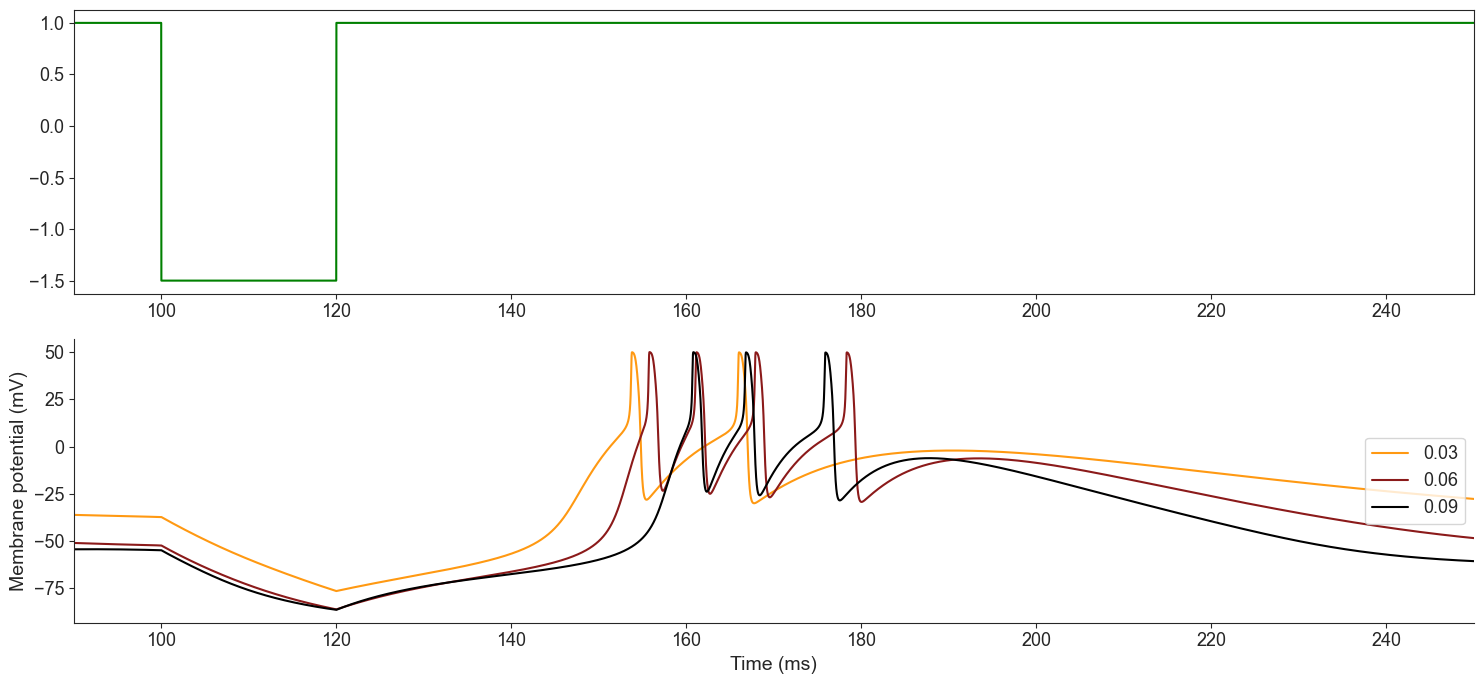

In [6]:
sns.set_style('ticks') # darkgrid, white grid, dark, white and ticks
sns.despine()  #does not seem to work
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=12)          # controls default text sizes
sns.color_palette('deep')[0]
plt.figure(figsize=(15,7), tight_layout=True) #7,5 is better for shorter plots



V_TRN1= allvariables_TRN_test1['Membrane potential (mV)']
I1=allvariables_TRN_test1['Injected current (μA)']

# V_TRN2= allvariables_TRN_test2['Membrane potential (mV)']
# I2=allvariables_TRN_test2['Injected current (μA)']

V_TRN3= allvariables_TRN_test3['Membrane potential (mV)']
I3=allvariables_TRN_test3['Injected current (μA)']

V_TRN4= allvariables_TRN_test4['Membrane potential (mV)']
I4=allvariables_TRN_test4['Injected current (μA)']

# V_TRN5= allvariables_TRN_test5['Membrane potential (mV)']
# I5=allvariables_TRN_test5['Injected current (μA)']

plt.subplot(2,1,1)
plt.plot(T,I1, color= 'green')
plt.xlim(90, 250)

plt.subplot(2,1,2)
plt.plot(T,V_TRN1,label='0.03', color='#FF9912')
plt.plot(T,V_TRN3,label='0.06', color='#8B1A1A')
plt.plot(T,V_TRN4,label='0.09', color='black')
plt.xlim(90, 250)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend( loc='right')

plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential (mV)')


### Experiment 2- Does the background current (synaptic, neuromodulation etc) affect the frequency of bursting in TRN?

In [7]:

T= duration_of_sim(0, 2000, dt=0.01)

I_TRNinput1= (0.15)*np.ones(len(T))
I_TRNinput3= 0.20*np.ones(len(T))
I_TRNinput5= (0.25)*np.ones(len(T))


allvariables_TRN_1=generateburstsTRN(I_TRNinput1,T,C_m, dt=0.01, regime_name="regime 1",k=0)
# allvariables_TRN_2=generateburstsTRN(I_TRNinput2,T,C_m, dt=0.01, regime_name="regime 1",k=0)
allvariables_TRN_3=generateburstsTRN(I_TRNinput3,T,C_m, dt=0.01, regime_name="regime 1",k=0)
# allvariables_TRN_4=generateburstsTRN(I_TRNinput4,T,C_m, dt=0.01, regime_name="regime 1",k=0)
allvariables_TRN_5=generateburstsTRN(I_TRNinput5,T,C_m, dt=0.01, regime_name="regime 1",k=0)

200 20 3
200 20 3
200 20 3


Text(0, 0.5, 'Membrane potential (mV)')

<Figure size 640x480 with 0 Axes>

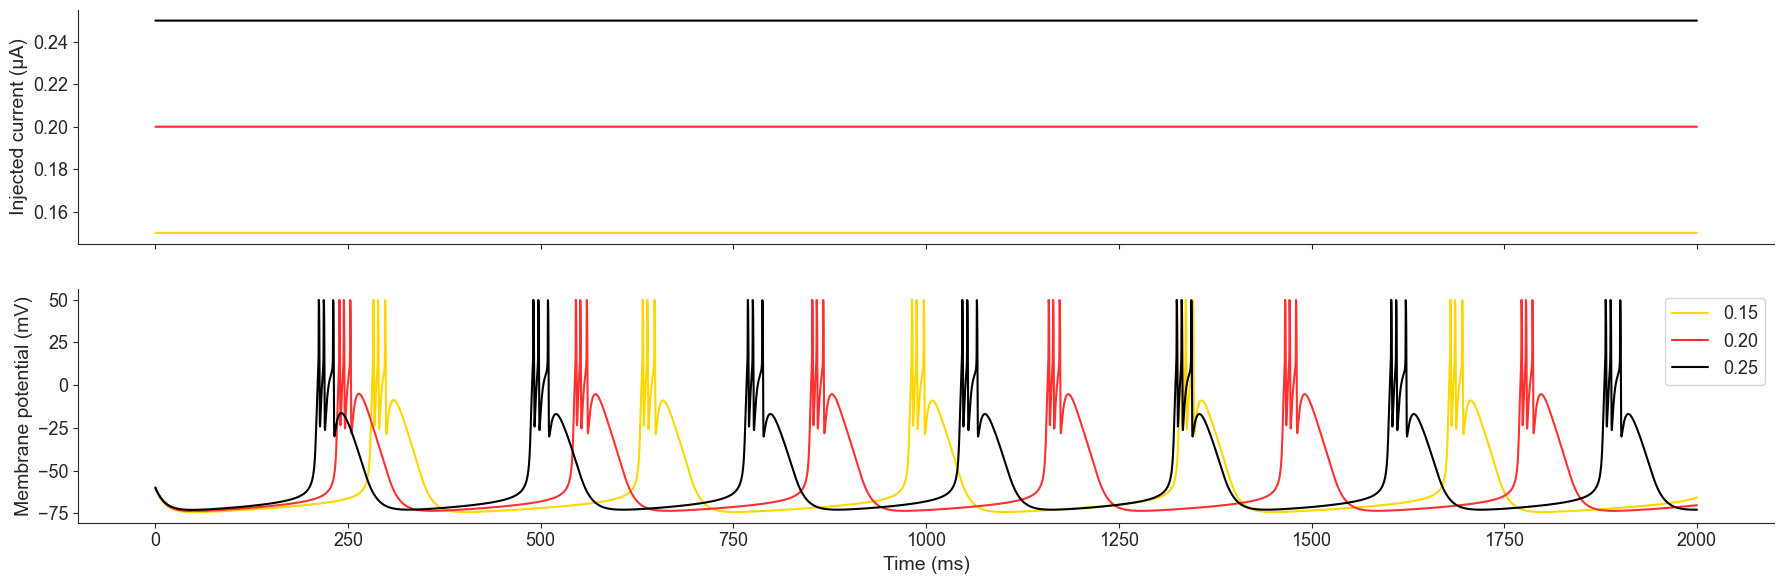

In [8]:
sns.set_style('ticks') # darkgrid, white grid, dark, white and ticks
sns.despine()  #does not seem to work
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=12)          # controls default text sizes
sns.color_palette('deep')[0]
plt.figure(figsize=(18,6), tight_layout=True) #7,5 is better for shorter plots


V_TRN0= allvariables_TRN_1['Membrane potential (mV)']
I0=allvariables_TRN_1['Injected current (μA)']

# V_TRN1= allvariables_TRN_2['Membrane potential (mV)']
# I1=allvariables_TRN_2['Injected current (μA)']

V_TRN2= allvariables_TRN_3['Membrane potential (mV)']
I2=allvariables_TRN_3['Injected current (μA)']

# V_TRN3= allvariables_TRN_4['Membrane potential (mV)']
# I3=allvariables_TRN_4['Injected current (μA)']

V_TRN4= allvariables_TRN_5['Membrane potential (mV)']
I4=allvariables_TRN_5['Injected current (μA)']


plt.subplot(2,1,1)
plt.plot(T,I0, label='0.15', color='#FFD700')
# plt.plot(T,I1,label='0.17', color='#FF9912')
plt.plot(T,I2,label='0.20',color='#FF3030')
# plt.plot(T,I3,label='0.23', color='#8B1A1A')
plt.plot(T,I4,label='0.25',color='black')
# plt.box(on=None) : removes the entire box
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(color='w')
plt.ylabel('Injected current (μA)')

plt.subplot(2,1,2)
plt.plot(T,V_TRN0, label='0.15', color='#FFD700')
# plt.plot(T,V_TRN1,label='0.17', color='#FF9912')
plt.plot(T,V_TRN2,label='0.20',color='#FF3030')
# plt.plot(T,V_TRN3,label='0.23', color='#8B1A1A')
plt.plot(T,V_TRN4,label='0.25',color='black')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend()

plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential (mV)')


In [9]:
spike_train0, spike_time0= generatespikes(V_pre=V_TRN0, V_th=25, T =T, dt=0.01)

# spike_train1, spike_time1= generatespikes(V_pre=V_TRN1, V_th=25, T =T, dt=0.01)

spike_train2, spike_time2= generatespikes(V_pre=V_TRN2, V_th=25, T =T, dt=0.01)

# pike_train3, spike_time3= generatespikes(V_pre=V_TRN3, V_th=25, T =T, dt=0.01)

spike_train4, spike_time4= generatespikes(V_pre=V_TRN4, V_th=25, T =T, dt=0.01)

isi_0=[]
# isi_1=[]
isi_2=[]
# isi_3=[]
isi_4=[]

isi_0 = np.diff(spike_time0)
# isi_1 = np.diff(spike_time1)
isi_2 = np.diff(spike_time2)
# isi_3 = np.diff(spike_time3)
isi_4 = np.diff(spike_time4)
idx0 = np.where(isi_0>250)
ibi_0 = isi_0[idx0]
id0=np.where(isi_0<250)
isi_0=isi_0[id0]
# idx1 = np.where(isi_1>250)
# ibi_1 = isi_1[idx1]
idx2 = np.where(isi_2>250)
ibi_2 = isi_2[idx2]
id2=np.where(isi_2<250)
isi_2=isi_2[id2]
# idx3 = np.where(isi_3>250)
# ibi_3 = isi_3[idx3]
idx4 = np.where(isi_4>250)
ibi_4 = isi_4[idx4]
id4=np.where(isi_4<250)
isi_4=isi_4[id4]




[]
[]
[]


In [10]:
## EFFICIENT method

import pandas as pd

isi_values= np.append(isi_0, isi_2)
isi_values=np.append(isi_values, isi_4)
isi_values

ibi_values= np.append(ibi_0, ibi_2)
ibi_values=np.append(ibi_values, ibi_4)
ibi_values

tag1=['0.15']
tag2=['0.20']
tag3=['0.25']
isi_tags=[]
q=""
tags=[]
tags=np.append(tag1,tag2)
tags=np.append(tags, tag3)
tags

l1=[len(isi_0), len(isi_2), len(isi_4)]

for j in range(len(tags)):
        for i in range(l1[j]):
                isi_tags+= [tags[j]]
        
isi_tags

ibi_tags=[]
l2=[len(ibi_0), len(ibi_2), len(ibi_4)]
# print(len(isi_0))
for j in range(len(tags)):
        for i in range(l2[j]):
                ibi_tags+= [tags[j]]

inter_spike_interval_bgcurrent= {'Inter spike interval (ms)':isi_values, 'Background current (μA)': isi_tags }
inter_burst_interval_bgcurrent={'Inter burst interval (ms)':ibi_values, 'Background current (μA)': ibi_tags }
burst_properties_bgcurrent={'Inter burst interval (ms)':ibi_values,'Inter spike interval (ms)':isi_values, 'Background current (μA)': isi_tags }
## save this data

data_isi_TRN= pd.DataFrame(inter_spike_interval_bgcurrent, columns= ['Inter spike interval (ms)', 'Background current (μA)']) 
data_isi_TRN

data_ibi_TRN= pd.DataFrame(inter_burst_interval_bgcurrent, columns= ['Inter burst interval (ms)', 'Background current (μA)']) 
data_ibi_TRN


,Inter burst interval (ms),Background current (μA)
0,334.09,0.15
1,333.93,0.15
2,333.93,0.15
3,333.94,0.15
4,292.66,0.20
5,292.56,0.20
6,292.56,0.20
7,292.56,0.20
8,292.56,0.20
9,259.74,0.25


c:\Users\mramada\AppData\Local\anaconda3\envs\model\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mramada\AppData\Local\anaconda3\envs\model\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mramada\AppData\Local\anaconda3\envs\model\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mramada\AppData\Local\anaconda3\envs\model\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

(2.0, 14.0)

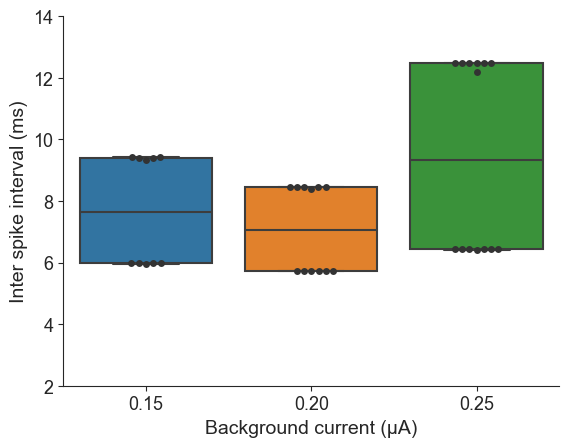

In [11]:
### plot using swarm or box plot

sns.set_style('ticks') # darkgrid, white grid, dark, white and ticks
sns.despine()  #does not seem to work
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=12)          # controls default text sizes
sns.color_palette('deep')[0]

sns.boxplot(x='Background current (μA)', y = 'Inter spike interval (ms)',
              data = data_isi_TRN, whis = np.inf)
sns.swarmplot(x='Background current (μA)', y = 'Inter spike interval (ms)',data = data_isi_TRN, color=".2")
sns.despine()
plt.ylim(2,14)

# plt.savefig('w points- ISI. test effect of bg current on the frequency of bursts in TRN gLmax= 0.1.pdf', bbox_inches = 'tight')



C:\Users\mramada\AppData\Local\Temp\ipykernel_6180\754116961.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Background current (μA)', y = 'Inter burst interval (ms)',
c:\Users\mramada\AppData\Local\anaconda3\envs\model\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mramada\AppData\Local\anaconda3\envs\model\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mramada\AppData\Local\anaconda3\envs\model\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinsta

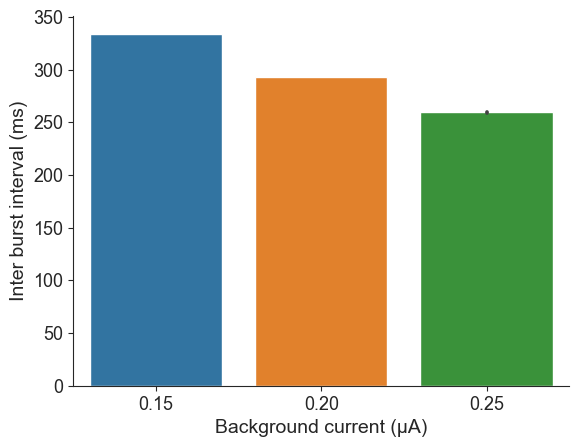

In [12]:
sns.barplot(x='Background current (μA)', y = 'Inter burst interval (ms)',
              data = data_ibi_TRN, ci='sd')
sns.despine()

# plt.savefig('bar IBI. test effect of bg current on the frequency of bursts in TRN.pdf', bbox_inches = 'tight')


c:\Users\mramada\AppData\Local\anaconda3\envs\model\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mramada\AppData\Local\anaconda3\envs\model\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mramada\AppData\Local\anaconda3\envs\model\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mramada\AppData\Local\anaconda3\envs\model\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

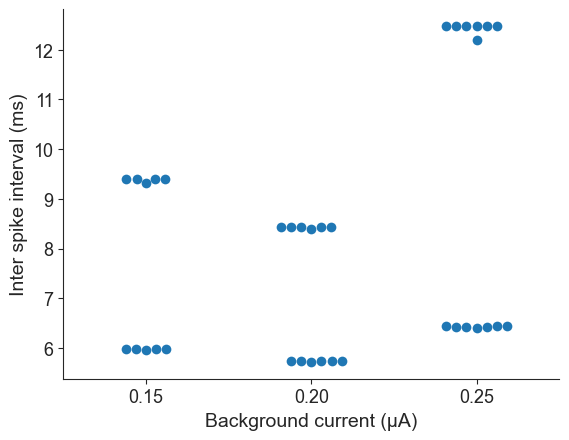

c:\Users\mramada\AppData\Local\anaconda3\envs\model\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mramada\AppData\Local\anaconda3\envs\model\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mramada\AppData\Local\anaconda3\envs\model\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mramada\AppData\Local\anaconda3\envs\model\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

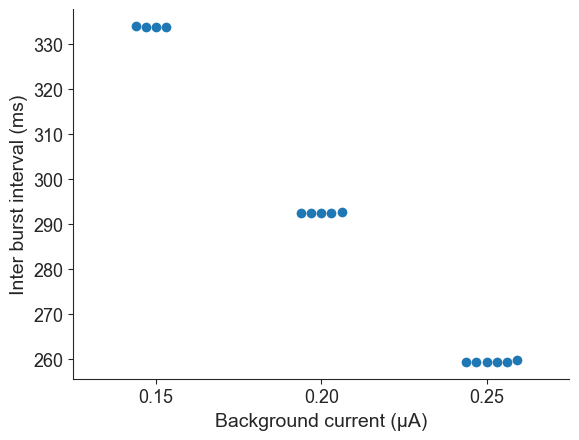

In [13]:
sns.swarmplot(x='Background current (μA)', y = 'Inter spike interval (ms)',
              data = data_isi_TRN, size=7)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

sns.swarmplot(x='Background current (μA)', y = 'Inter burst interval (ms)',
              data = data_ibi_TRN,size=7)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

### Experiment 3- for Results Figure 1- importance of intrinsic currents in generating bursts in TRN

In [14]:
T= duration_of_sim(0, 2000, dt=0.01)

I_TRNinput= np.zeros(len(T))
I_TRNinput[10000:12000]= -1.5



In [15]:
allvariables_TRN_0gT=generateburstsTRN(I_TRNinput,T,C_m, dt=0.01, regime_name="gT=0",k=0)

200 20 0


In [16]:
allvariables_TRN_0gNaK=generateburstsTRN(I_TRNinput,T,C_m, dt=0.01, regime_name="gK=gNa=0",k=0)

0 0 3


In [17]:
allvariables_TRN=generateburstsTRN(I_TRNinput,T,C_m, dt=0.01, regime_name="regime 1",k=0)

200 20 3


Text(0, 0.5, 'Membrane potential (mV)')

<Figure size 640x480 with 0 Axes>

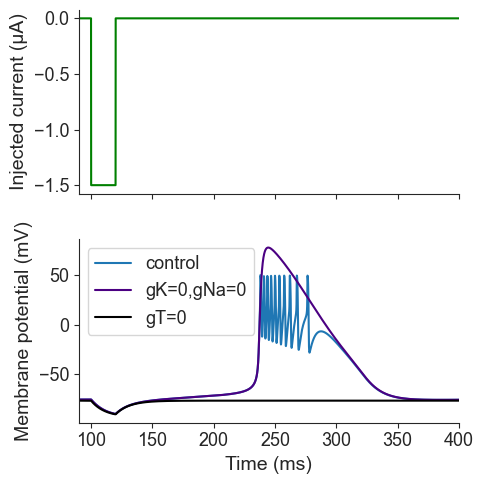

In [18]:
sns.set_style('ticks') # darkgrid, white grid, dark, white and ticks
sns.despine()  #does not seem to work
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=12)          # controls default text sizes
sns.color_palette('deep')[0]
plt.figure(figsize=(5,5), tight_layout=True) #7,5 is better for shorter plots


V_TRN_0gT= allvariables_TRN_0gT['Membrane potential (mV)']
V_TRN_0gNaK=allvariables_TRN_0gNaK['Membrane potential (mV)']
V_TRN=allvariables_TRN['Membrane potential (mV)']
I=allvariables_TRN_0gT['Injected current (μA)']

plt.subplot(2,1,1)
plt.plot(T,I, color= 'green')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(color='w')
plt.xlim(90,400)
plt.ylabel('Injected current (μA)')
plt.subplot(2,1,2)
plt.plot(T,V_TRN, label ='control')
plt.plot(T, V_TRN_0gNaK, label='gK=0,gNa=0', color='indigo')
plt.plot(T, V_TRN_0gT, label= 'gT=0', color='black')
plt.xlim(90,400)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend()

plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential (mV)')


##### Experiment: change gT values to see if that affects the burtsing properties of TRN cells

In [19]:
T= duration_of_sim(0, 1000, dt=0.01)

I_TRNinputT= 0*np.ones(len(T))
I_TRNinputT[10000:15000]= -3



In [20]:
allvariables_TRN_gT1=generateburstsTRN(I_TRNinputT,T,C_m, dt=0.01, regime_name="test gT",k=0)

200 20 1


In [21]:
allvariables_TRN_gT150=generateburstsTRN(I_TRNinputT,T,C_m, dt=0.01, regime_name="test gT",k=1)

200 20 1.5


In [22]:
allvariables_TRN_gT175=generateburstsTRN(I_TRNinputT,T,C_m, dt=0.01, regime_name="test gT",k=2)

200 20 1.75


In [23]:
allvariables_TRN_gT2=generateburstsTRN(I_TRNinputT,T,C_m, dt=0.01, regime_name="test gT",k=3)

200 20 2


In [24]:
allvariables_TRN_gT250=generateburstsTRN(I_TRNinputT,T,C_m, dt=0.01, regime_name="test gT",k=4)

200 20 2.5


In [25]:
allvariables_TRN_gT275=generateburstsTRN(I_TRNinputT,T,C_m, dt=0.01, regime_name="test gT",k=5)

200 20 2.75


In [26]:
allvariables_TRN_gT3=generateburstsTRN(I_TRNinputT,T,C_m, dt=0.01, regime_name="test gT",k=6)

200 20 3


Text(0, 0.5, 'Membrane potential (mV)')

<Figure size 640x480 with 0 Axes>

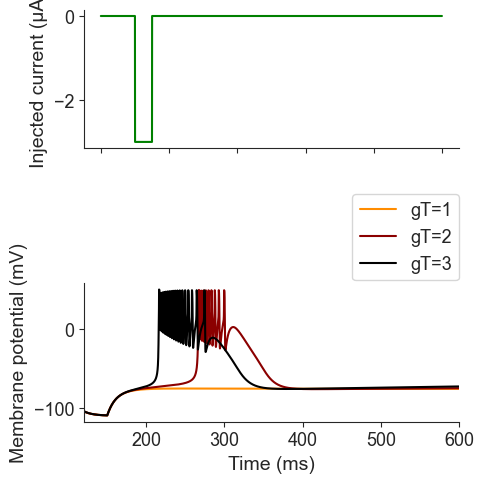

In [27]:
sns.set_style('ticks') # darkgrid, white grid, dark, white and ticks
sns.despine()  #does not seem to work
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=12)          # controls default text sizes
sns.color_palette('deep')[0]
plt.figure(figsize=(5,5), tight_layout=True) #7,5 is better for shorter plots


# V_TC= allvariables_TC['Membrane potential (mV)']
I=allvariables_TRN_gT1['Injected current (μA)']

V_TRN_gT1=allvariables_TRN_gT1['Membrane potential (mV)']
# V_TRN_gT175=allvariables_TRN_gT175['Membrane potential (mV)']
V_TRN_gT2=allvariables_TRN_gT2['Membrane potential (mV)']
# V_TRN_gT250=allvariables_TRN_gT250['Membrane potential (mV)']
# V_TRN_gT275=allvariables_TRN_gT275['Membrane potential (mV)']
V_TRN_gT3=allvariables_TRN_gT3['Membrane potential (mV)']
# V_TC_gT1=allvariables_TC_gT1['Membrane potential (mV)']

plt.subplot(2,1,1)
plt.plot(T,I_TRNinputT, color= 'green')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(color='w')
# plt.ylim(-1.6,0.2)
# plt.xlim(120,600)
plt.ylabel('Injected current (μA)')

plt.subplot(2,1,2)
plt.plot(T, V_TRN_gT1, label='gT=1', color='darkorange')
plt.plot(T, V_TRN_gT2, label= 'gT=2', color='#8B0000')
plt.plot(T, V_TRN_gT3, label= 'gT=3', color= 'black')#FF8000')
plt.xlim(120,600)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=4,ncol=1, borderaxespad=0.)
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential (mV)')


### Experiment 4 - Role of cortical SOs on TRN burtsing 

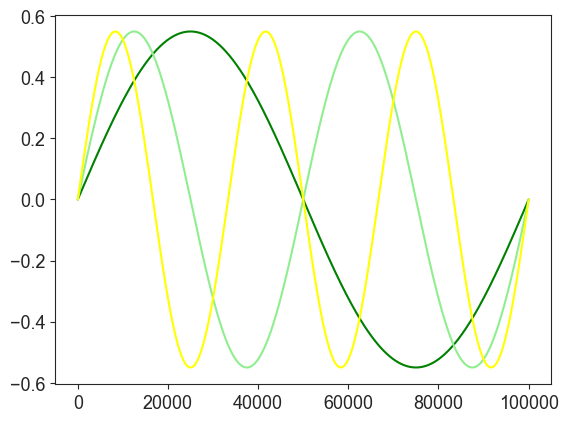

In [28]:
fs1 = 100000 
fs2 = 100000 # sample rate 
f1 = 1 # the frequency of the signal
f2= 2
f3=3
x1 = np.arange(fs1)
x2 = np.arange(fs2) # the points on the x axis for plotting
# compute the value (amplitude) of the sin wave at the for each sample
y1 = 0.55*np.sin(2*np.pi*f1 * (x1/fs1)) 
y2 = 0.55*np.sin(2*np.pi*f2 * (x2/fs2)) 
y3 =  0.55*np.sin(2*np.pi*f3 * (x1/fs1)) 
#this instruction can only be used with IPython Notbook. 
# % matplotlib inline
# showing the exact location of the smaples
plt.plot(x1,y1, color='green')
plt.plot(x2,y2, color='lightgreen')
plt.plot(x2,y3, color='yellow')

In [29]:
T= duration_of_sim(0, 3000, dt=0.01)

I_TRNinput1= np.zeros(len(T))
I_TRNinput2= np.zeros(len(T))
I_TRNinput3= np.zeros(len(T))
I_TRNinput1[30000:130000]= y1 
I_TRNinput2[30000:80000]= y2[0:50000]  ## sine wave given for 1 seconds 
I_TRNinput3[30000:63000]= y3[0:33000]
# I_TCinput[100000:102000]= -1.5
# I_TCinput[150000:152000]= -1.5

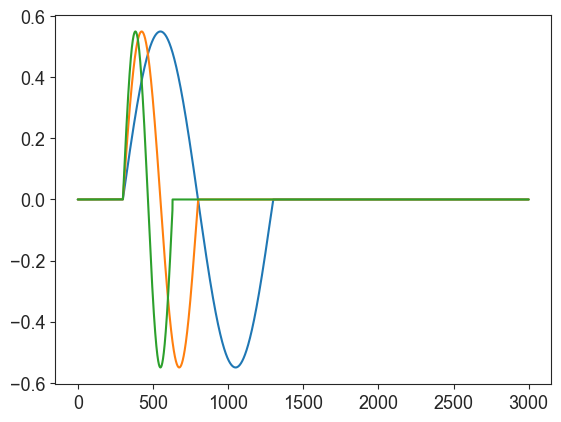

In [30]:
plt.plot(T,I_TRNinput1)
plt.plot(T,I_TRNinput2)
plt.plot(T,I_TRNinput3)
# plt.xlim(50,200)

In [31]:
allvariables_Trn_SO1=generateburstsTRN(I_TRNinput1,T,C_m, dt=0.01, regime_name="regime 2",k=0)
allvariables_Trn_SO2=generateburstsTRN(I_TRNinput2,T,C_m, dt=0.01, regime_name="regime 2",k=0)
allvariables_Trn_SO3=generateburstsTRN(I_TRNinput3,T,C_m, dt=0.01, regime_name="regime 2",k=0)

200 20 3
200 20 3
200 20 3


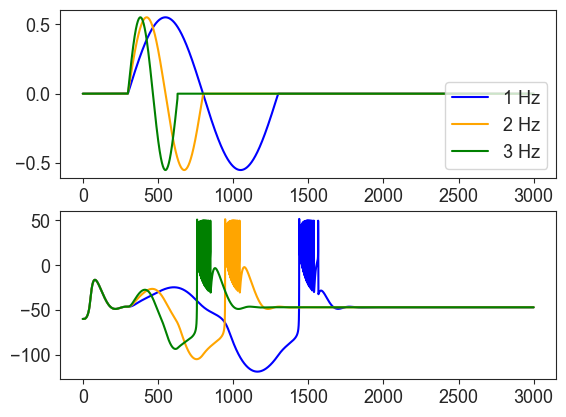

In [32]:
V_TRN_SO1=allvariables_Trn_SO1['Membrane potential (mV)']
V_TRN_SO2=allvariables_Trn_SO2['Membrane potential (mV)']
V_TRN_SO3=allvariables_Trn_SO3['Membrane potential (mV)']

plt.subplot(2,1,1)
plt.plot(T,I_TRNinput1, color='blue', label='1 Hz')
plt.legend(loc=4)
plt.plot(T,I_TRNinput2, color='orange',  label='2 Hz')
plt.legend(loc=4)
plt.plot(T,I_TRNinput3, color='green', label='3 Hz')
plt.legend(loc=4)

plt.subplot(2,1,2)
plt.plot(T, V_TRN_SO1,  color= 'blue')#FF8000'
plt.plot(T, V_TRN_SO2,  color= 'orange')#FF8000
plt.plot(T, V_TRN_SO3,  color= 'green')#